# Análise Exploratória dos Dados


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from itables import show

In [105]:
# Constants
PROCESSED_DATA_DIR = '../data/processed'

total_total_data = pd.read_csv(PROCESSED_DATA_DIR+"/total_total_data.csv", delimiter=";")
total_total_data_fun = pd.read_csv(PROCESSED_DATA_DIR+"/total_total_data_fun.csv", delimiter=";")
total_total_data_med = pd.read_csv(PROCESSED_DATA_DIR+"/total_total_data_med.csv", delimiter=";")

In [106]:
def _get_df_info(df, df_name):
    print(f'------------------------ {df_name} ------------------------')
    df.info()
    print('\n--- REGISTROS NÃO REPETIDOS:', 
            df.drop_duplicates().shape[0], '\n')

In [107]:
_get_df_info(total_total_data, 'total_total_data')
_get_df_info(total_total_data_fun, 'total_total_data_fun')
_get_df_info(total_total_data_med, 'total_total_data_med')

------------------------ total_total_data ------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 89 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UF_CODE            645 non-null    int64  
 1   CO_MUNICIPIO       645 non-null    int64  
 2   TXT_1_CAT1_CATFUN  645 non-null    float64
 3   TXT_1_CAT1_CATMED  645 non-null    float64
 4   TXT_1_CAT2_CATFUN  645 non-null    float64
 5   TXT_1_CAT2_CATMED  645 non-null    float64
 6   EVASAO_FUN         645 non-null    float64
 7   EVASAO_MED         645 non-null    float64
 8   TDI_FUN_CAT_0      645 non-null    float64
 9   TDI_FUN_AI_CAT_0   645 non-null    float64
 10  TDI_FUN_AF_CAT_0   645 non-null    float64
 11  TDI_FUN_01_CAT_0   645 non-null    float64
 12  TDI_FUN_02_CAT_0   645 non-null    float64
 13  TDI_FUN_03_CAT_0   645 non-null    float64
 14  TDI_FUN_04_CAT_0   645 non-null    float64
 15  TDI_FUN

In [108]:
# Missing Data DataFrame
df_missing = pd.DataFrame({'Feature': total_total_data.columns, 'Missing': total_total_data.isnull().sum()})
df_missing['Percentage'] = (df_missing['Missing'] / len(total_total_data)) * 100

# There are no missing values in the dataset
print(df_missing["Missing"].max())


0


In [109]:
metrics_dict = {}

for df, df_name in [(total_total_data, 'total'), (total_total_data_fun, "fun"), (total_total_data_med, 'med')]:
    # Get basic metrics
    df_metrics = total_total_data.describe().round(2)

    # Add mode
    mode = total_total_data.mode().iloc[0]
    mode_df = pd.DataFrame(mode).transpose()
    mode_df.index = ['mode']
    
    df_metrics = pd.concat([df_metrics, mode_df])
    
    metrics_dict[df_name] = df_metrics

show(metrics_dict['fun'])

<Figure size 1000x600 with 0 Axes>

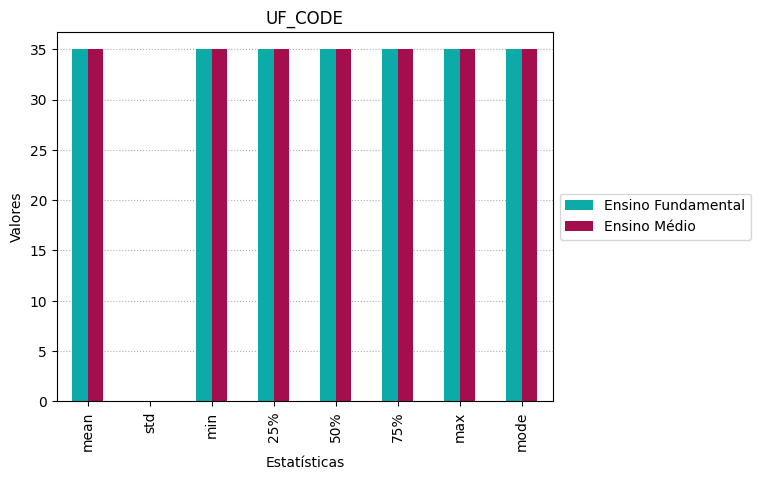

<Figure size 1000x600 with 0 Axes>

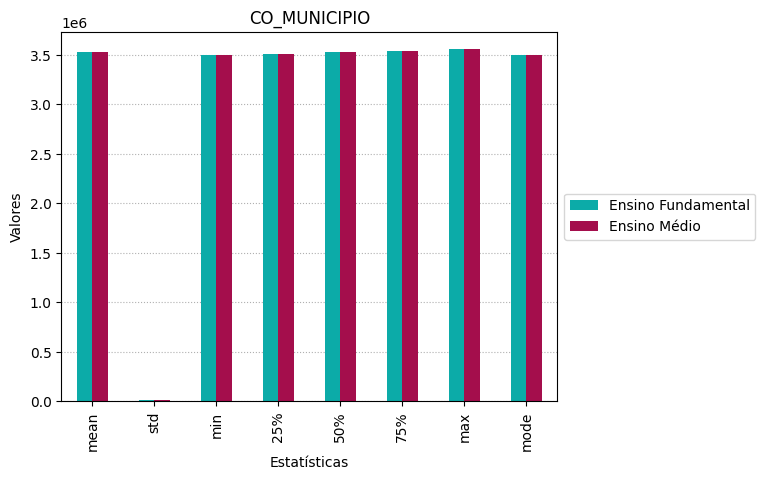

<Figure size 1000x600 with 0 Axes>

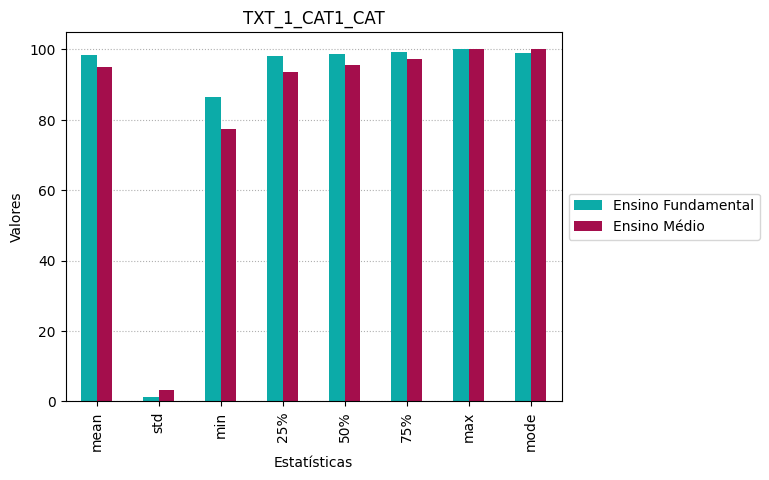

<Figure size 1000x600 with 0 Axes>

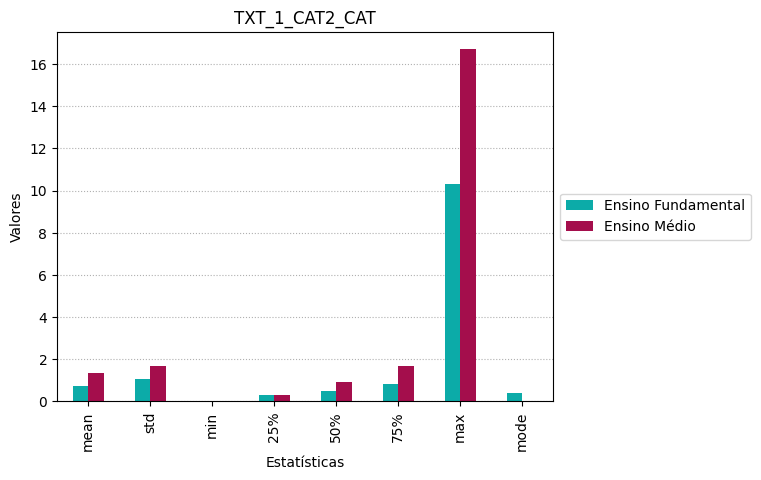

<Figure size 1000x600 with 0 Axes>

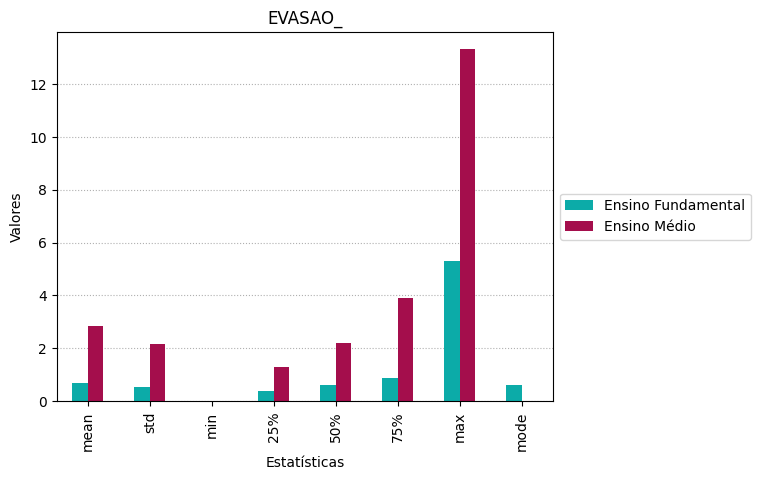

<Figure size 1000x600 with 0 Axes>

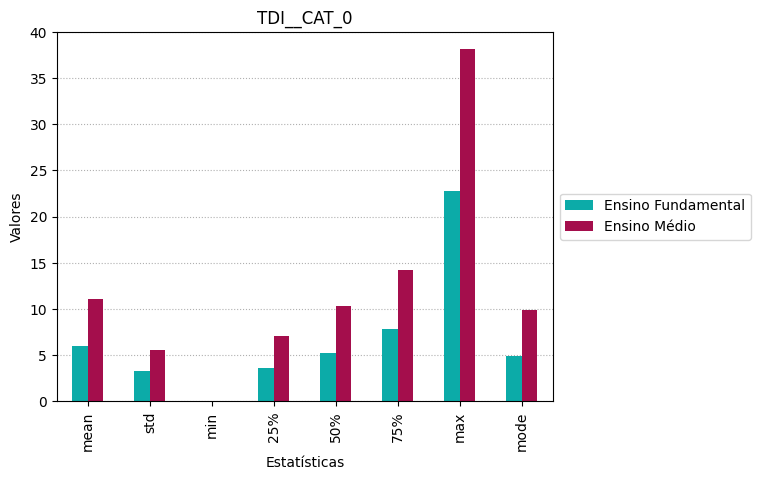

<Figure size 1000x600 with 0 Axes>

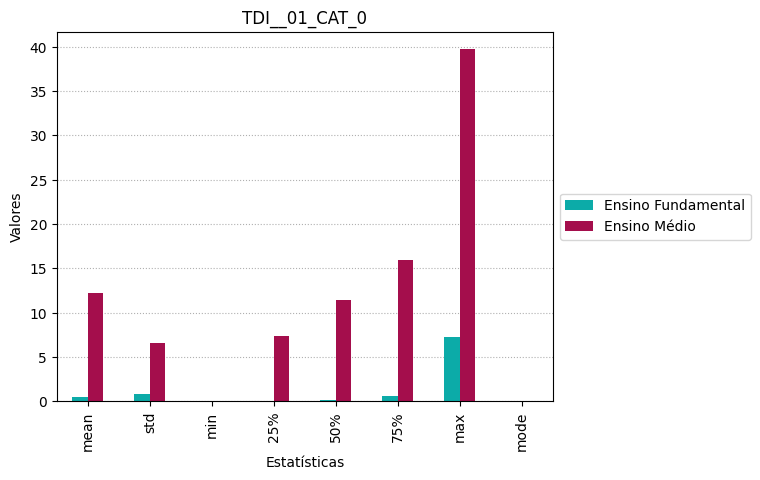

<Figure size 1000x600 with 0 Axes>

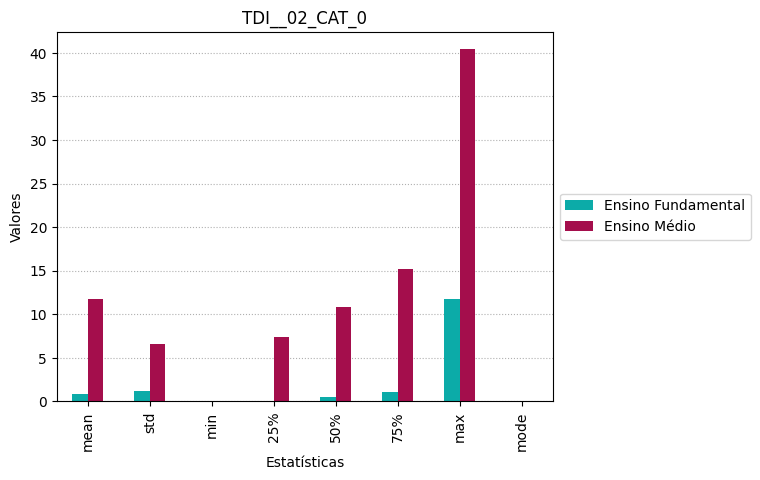

<Figure size 1000x600 with 0 Axes>

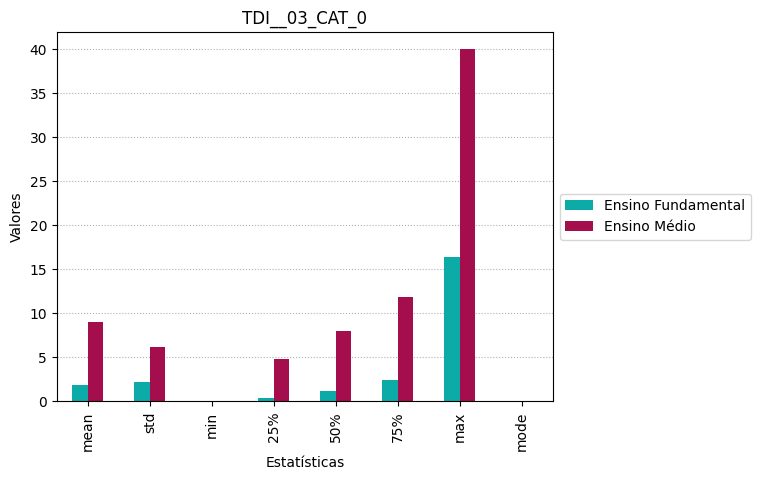

<Figure size 1000x600 with 0 Axes>

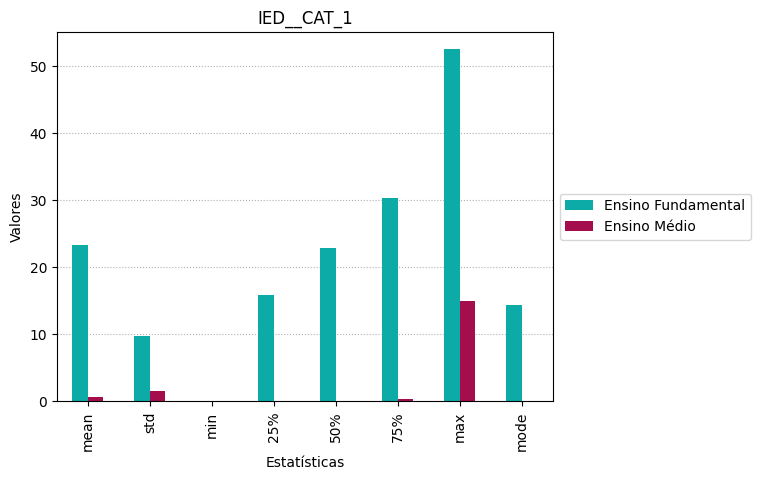

<Figure size 1000x600 with 0 Axes>

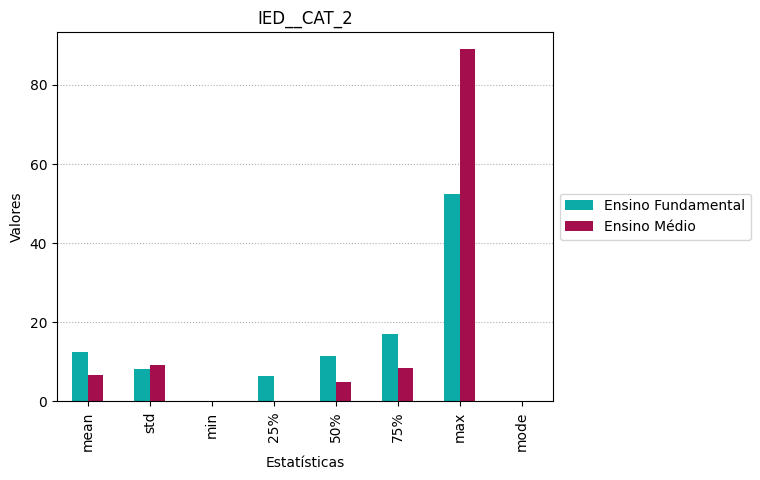

<Figure size 1000x600 with 0 Axes>

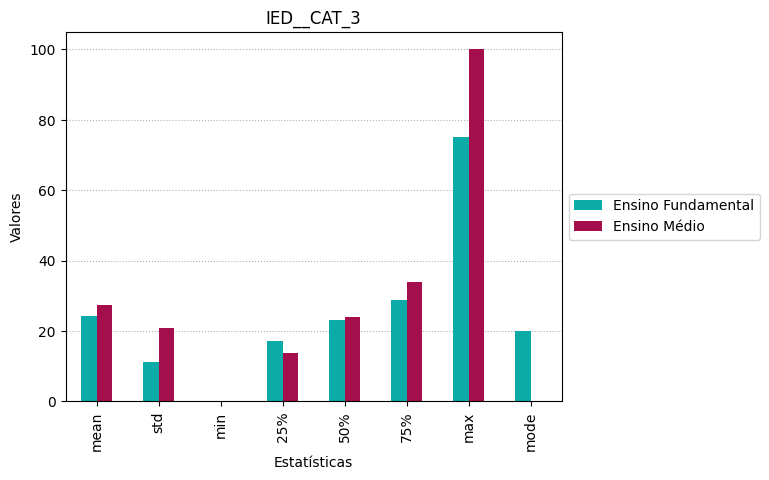

<Figure size 1000x600 with 0 Axes>

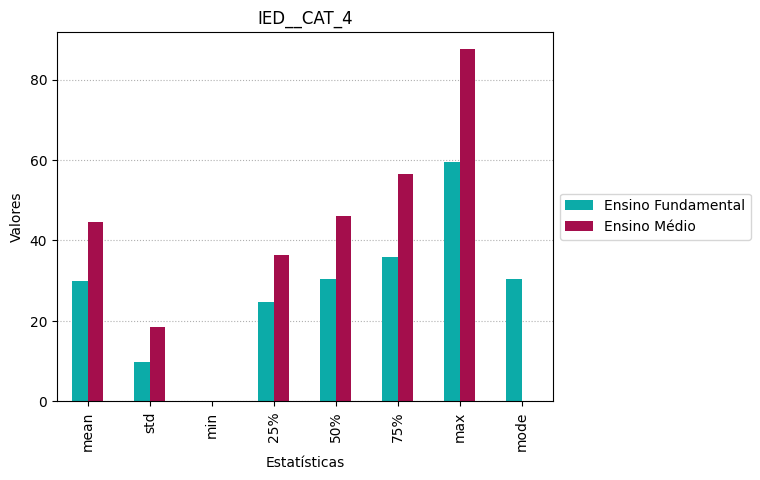

<Figure size 1000x600 with 0 Axes>

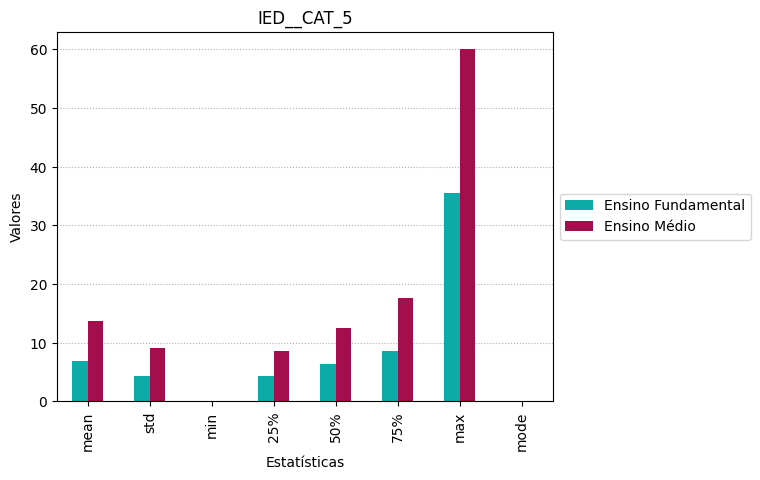

<Figure size 1000x600 with 0 Axes>

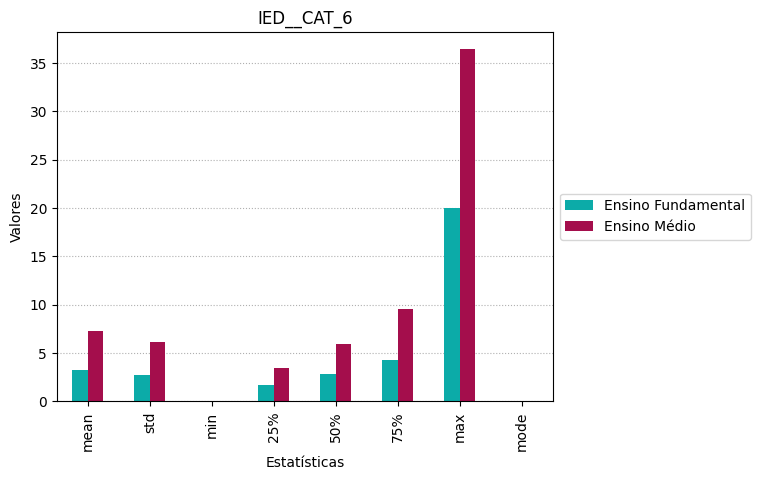

<Figure size 1000x600 with 0 Axes>

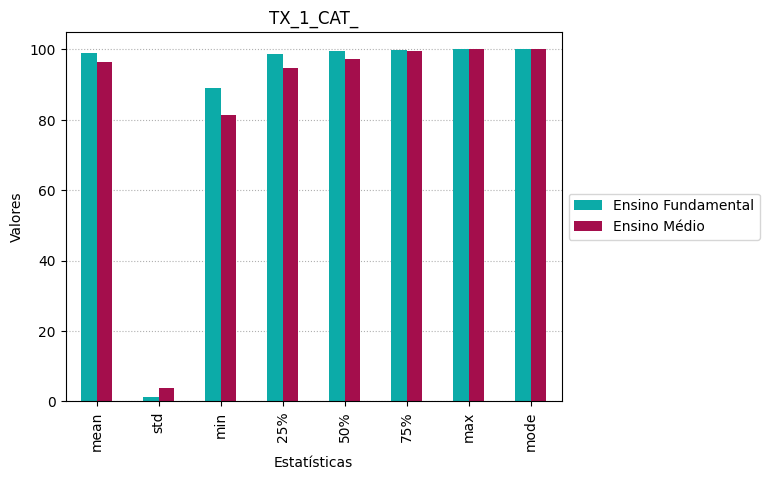

<Figure size 1000x600 with 0 Axes>

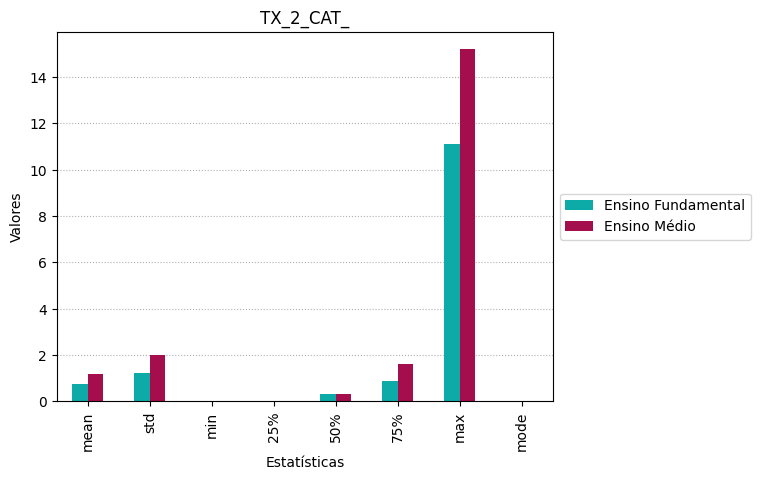

<Figure size 1000x600 with 0 Axes>

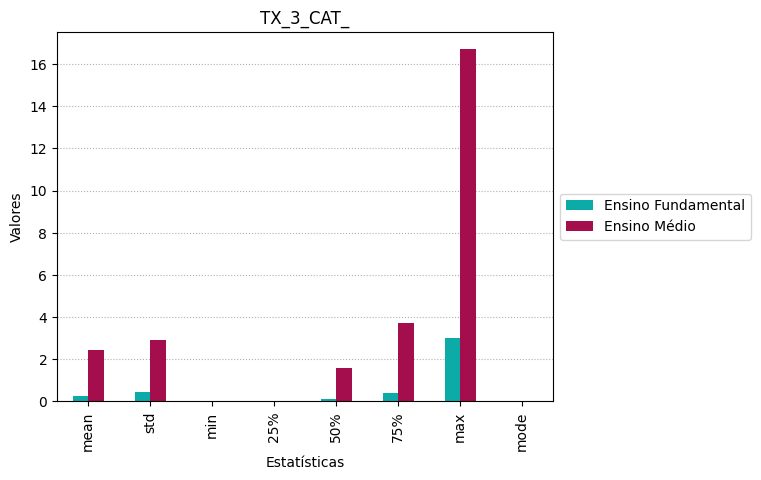

<Figure size 1000x600 with 0 Axes>

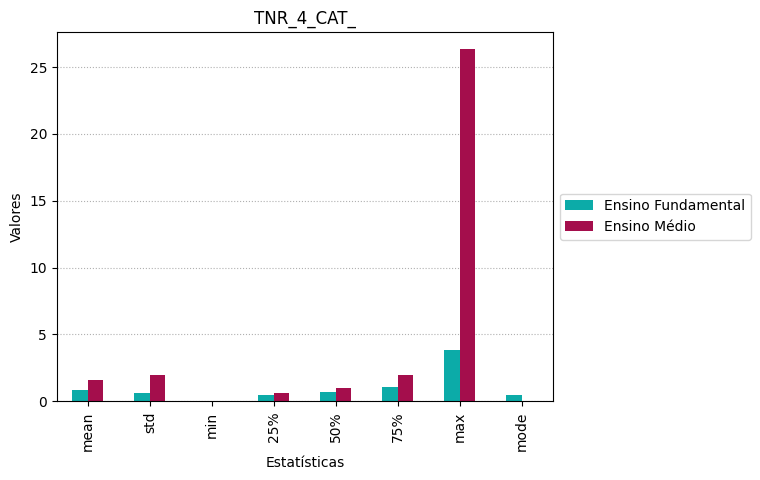

<Figure size 1000x600 with 0 Axes>

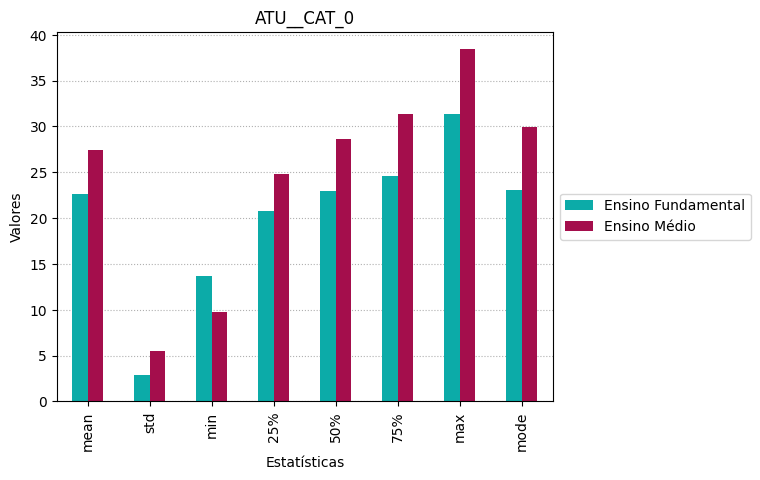

<Figure size 1000x600 with 0 Axes>

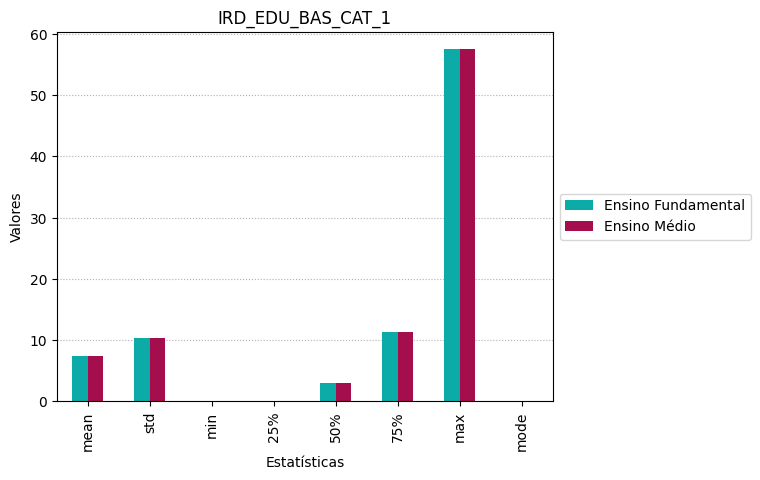

<Figure size 1000x600 with 0 Axes>

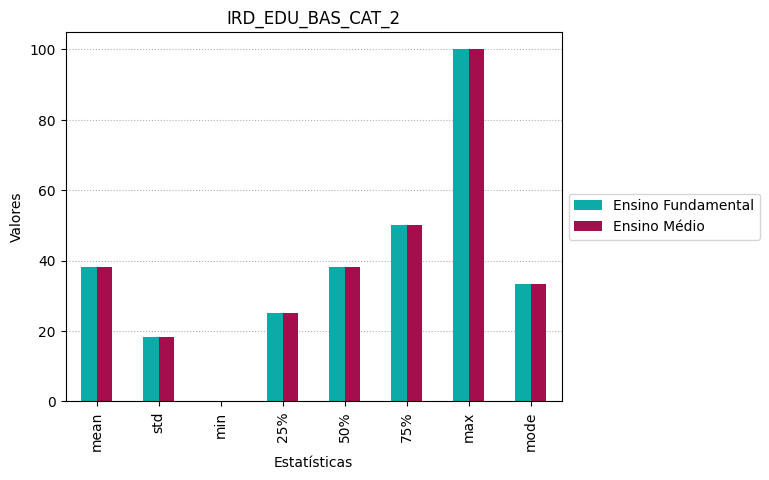

<Figure size 1000x600 with 0 Axes>

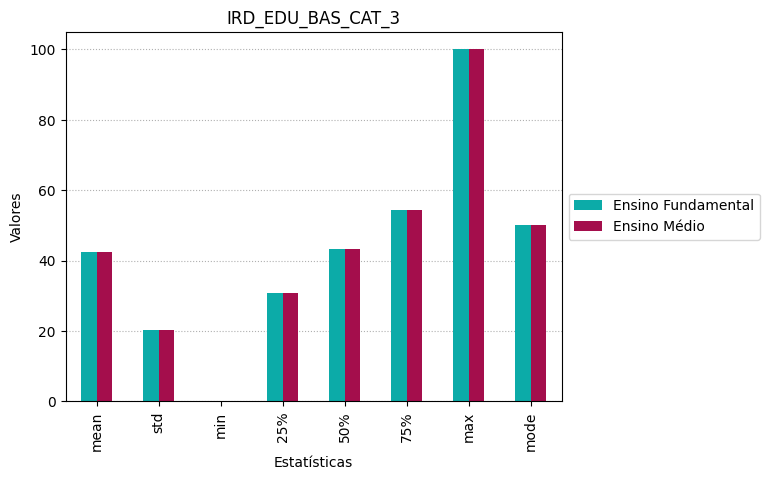

<Figure size 1000x600 with 0 Axes>

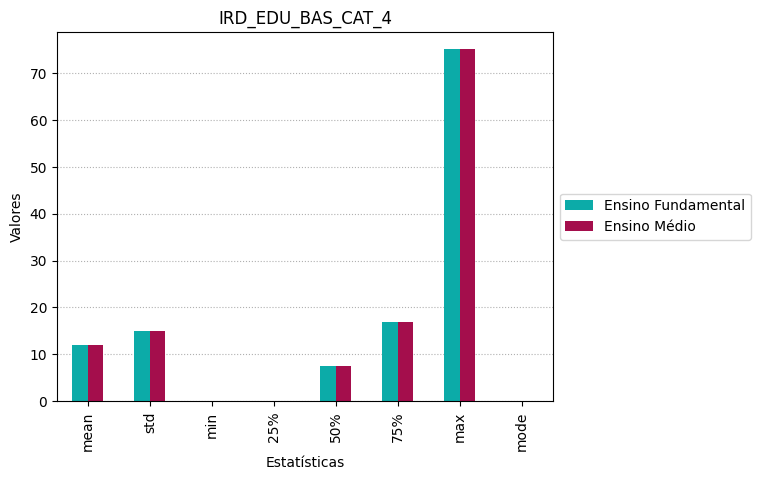

<Figure size 1000x600 with 0 Axes>

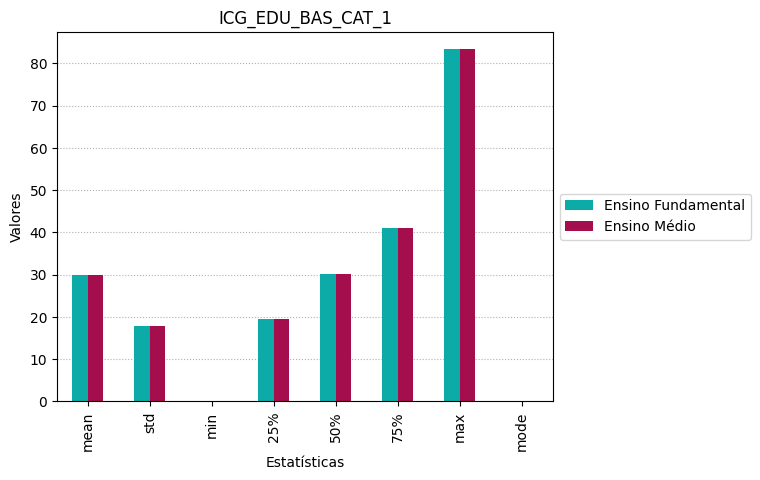

<Figure size 1000x600 with 0 Axes>

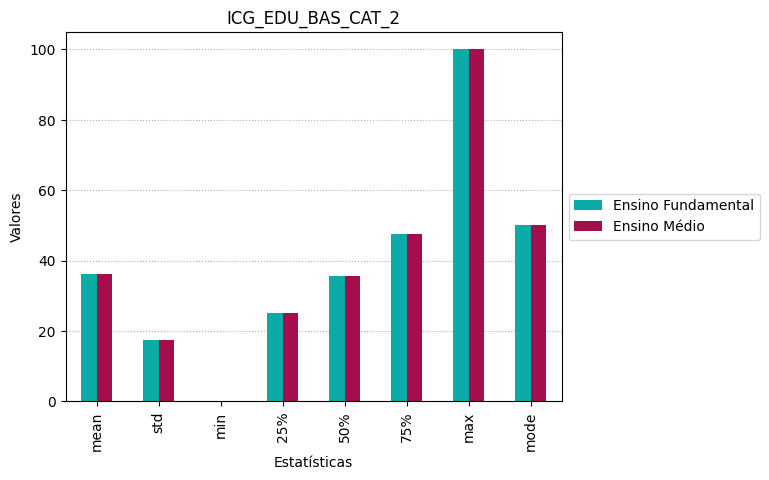

<Figure size 1000x600 with 0 Axes>

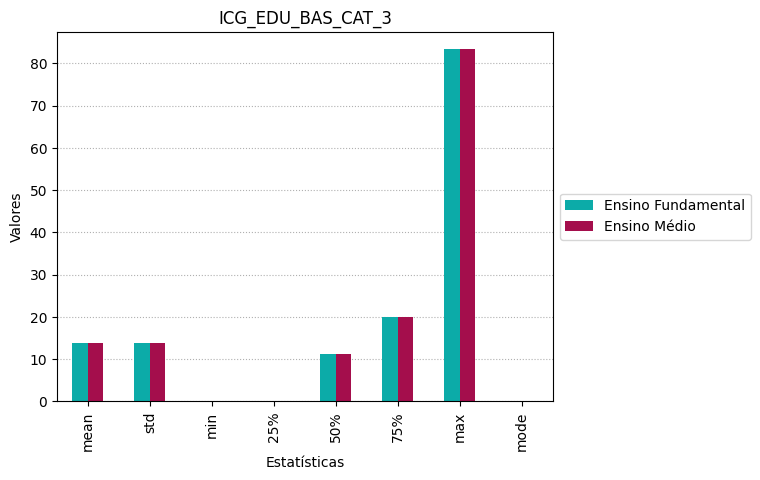

<Figure size 1000x600 with 0 Axes>

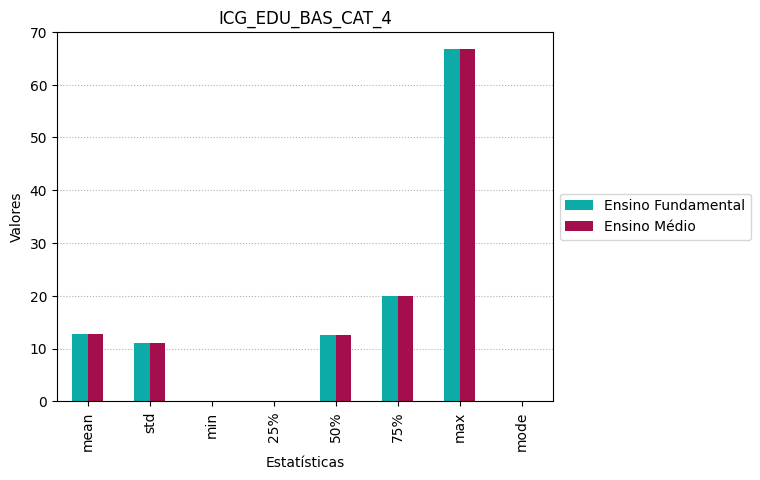

<Figure size 1000x600 with 0 Axes>

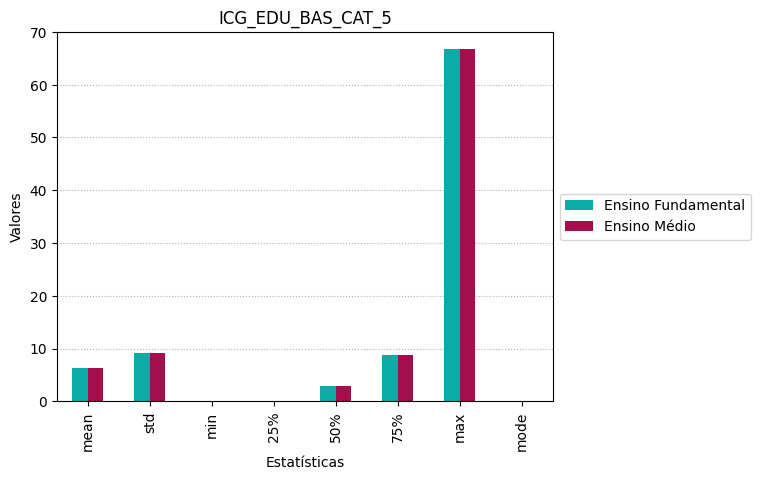

<Figure size 1000x600 with 0 Axes>

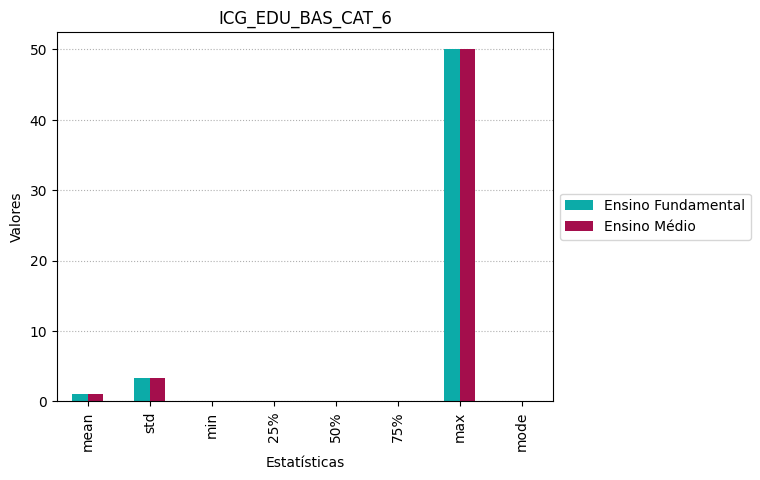

<Figure size 1000x600 with 0 Axes>

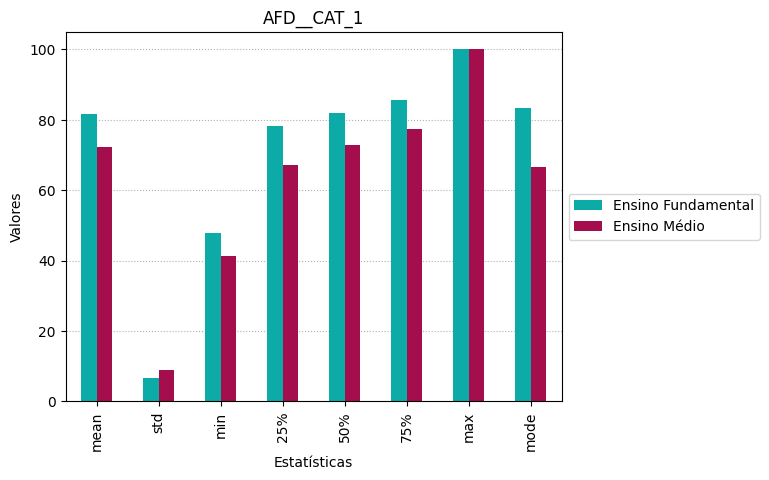

<Figure size 1000x600 with 0 Axes>

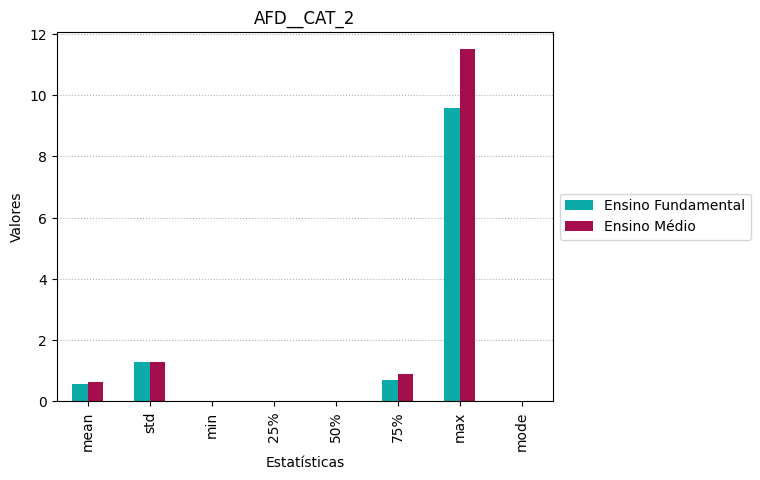

<Figure size 1000x600 with 0 Axes>

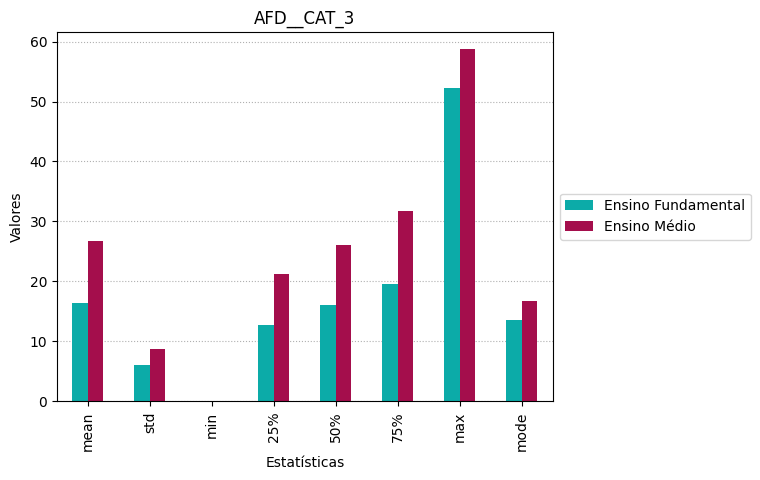

<Figure size 1000x600 with 0 Axes>

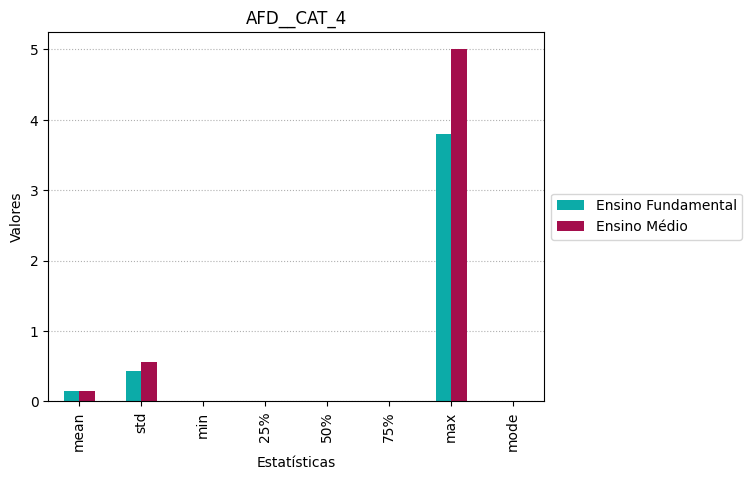

<Figure size 1000x600 with 0 Axes>

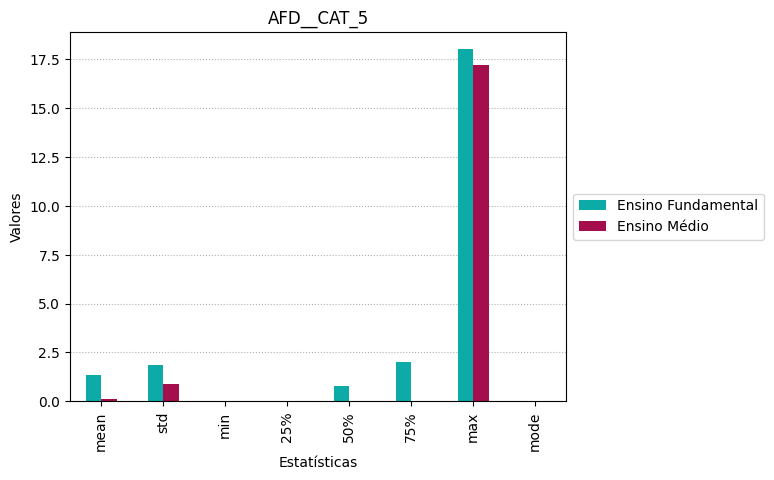

<Figure size 1000x600 with 0 Axes>

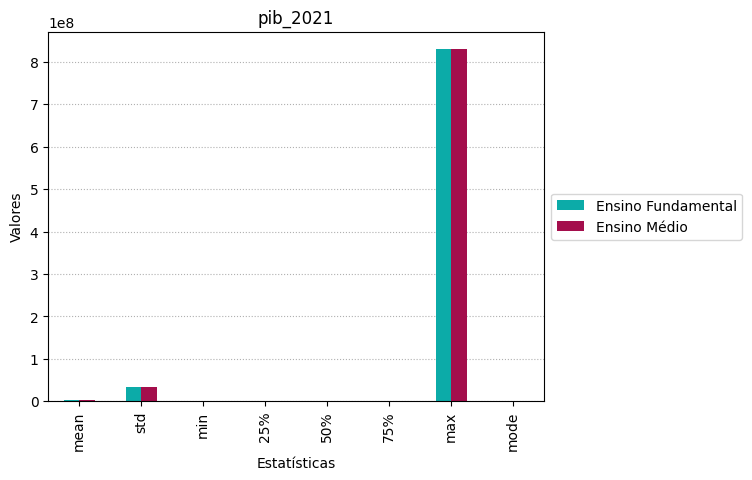

In [110]:
FUN_COLOR = '#0CABA8'
MED_COLOR = '#A40E4C'

def _made_plot(col_fun, col_med):
    # Combine the describe results
    combined_describe_result = pd.concat([metrics_dict['fun'][col_fun], metrics_dict['med'][col_med]], axis=1)
    combined_describe_result.drop(['count'], inplace=True)
    combined_describe_result.columns = [col_fun, col_med]

    # Plot the results
    plt.figure(figsize=(10, 6))
    combined_describe_result.plot(kind='bar', color=[FUN_COLOR, MED_COLOR])
    plt.title(col_fun.replace("FUN", ""))
    plt.xlabel('Estatísticas')
    plt.ylabel('Valores')
    plt.legend(["Ensino Fundamental", "Ensino Médio"], loc='center left', bbox_to_anchor=(1, 0.5))
    plt.gca().set_axisbelow(True)
    plt.gca().set_zorder(0)
    plt.grid(axis='y', linestyle='dotted', zorder=1)
    plt.show()

columns_fun = list(total_total_data_fun.columns.values)

for col_fun in columns_fun:
    if col_fun.replace("FUN", 'MED') in total_total_data_med.columns:
        _made_plot(col_fun, col_fun.replace("FUN", 'MED'))


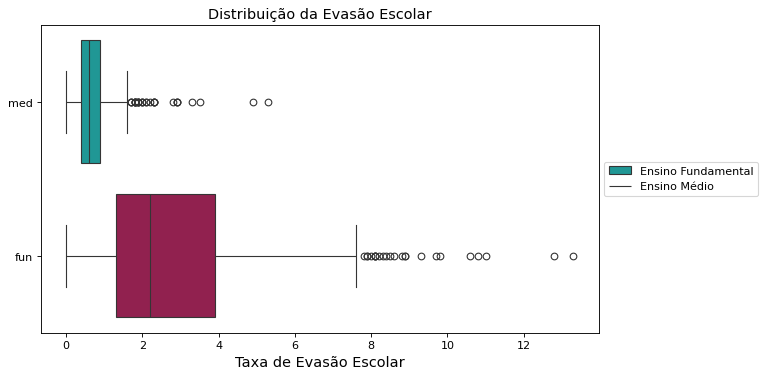

In [111]:
EVASAO_FUN = "EVASAO_FUN"
EVASAO_MED = "EVASAO_MED"

fontsize = 13
plt.figure(figsize = (9, 5), dpi = 80)
ax = sns.boxplot(
    data = {'med': total_total_data[EVASAO_FUN], 'fun':total_total_data[EVASAO_MED]},
    palette=[FUN_COLOR, MED_COLOR],
    orient='h'
)
plt.legend(["Ensino Fundamental", "Ensino Médio"], loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Distribuição da Evasão Escolar', fontsize = fontsize)
ax.set_xlabel('Taxa de Evasão Escolar', fontsize = fontsize)
plt.show()

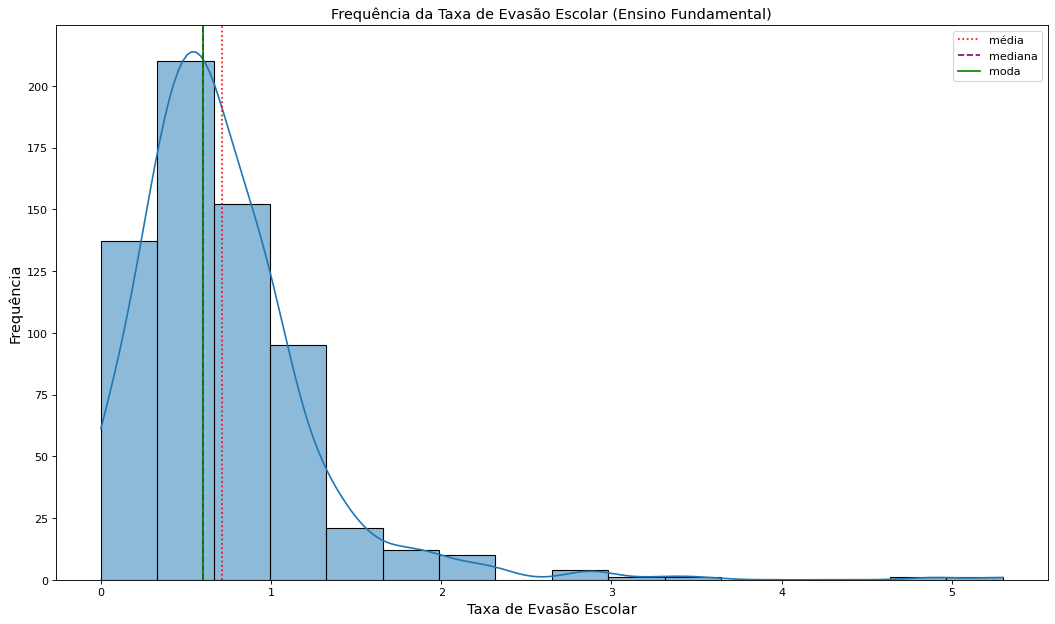

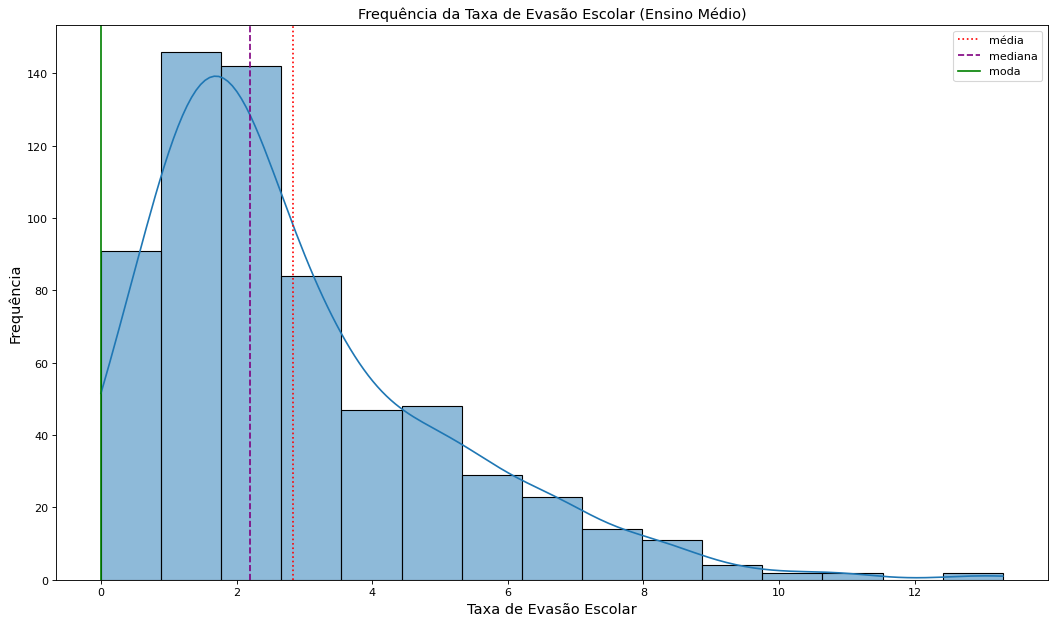

In [112]:
for ev in [EVASAO_FUN, EVASAO_MED]:
    fig = plt.figure(figsize = (16, 9), dpi = 80)
    ax = sns.histplot(total_total_data[ev], bins = 'doane', stat = 'count', kde = True)
    ax.axvline(total_total_data[ev].mean(), color = 'red', label = 'média', linestyle = 'dotted')
    ax.axvline(total_total_data[ev].median(), color = 'purple', label = 'mediana', linestyle = 'dashed')
    ax.axvline(total_total_data[ev].mode()[0], color = 'green', label = 'moda')
    ax.set_title(f'Frequência da Taxa de Evasão Escolar ({"Ensino Médio" if "MED" in ev else "Ensino Fundamental"})', fontsize = fontsize)
    ax.set_xlabel('Taxa de Evasão Escolar', fontsize = fontsize)
    ax.set_ylabel('Frequência', fontsize = fontsize)
    plt.legend()
    plt.show()

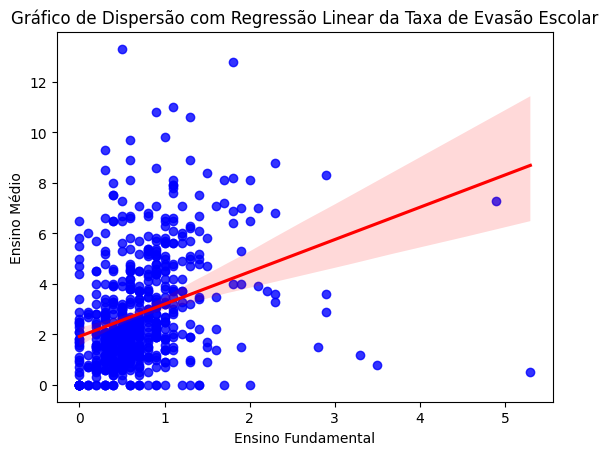

In [113]:
sns.regplot(x=EVASAO_FUN, y=EVASAO_MED, data=total_total_data, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.xlabel('Ensino Fundamental')
plt.ylabel('Ensino Médio')
plt.title('Gráfico de Dispersão com Regressão Linear da Taxa de Evasão Escolar')
plt.show()


In [114]:
correlation_matrix = total_total_data.corr()
# show(correlation_matrix)

In [115]:
show(correlation_matrix[EVASAO_FUN].sort_values(ascending=False))

In [116]:
show(correlation_matrix[EVASAO_MED].sort_values(ascending=False))

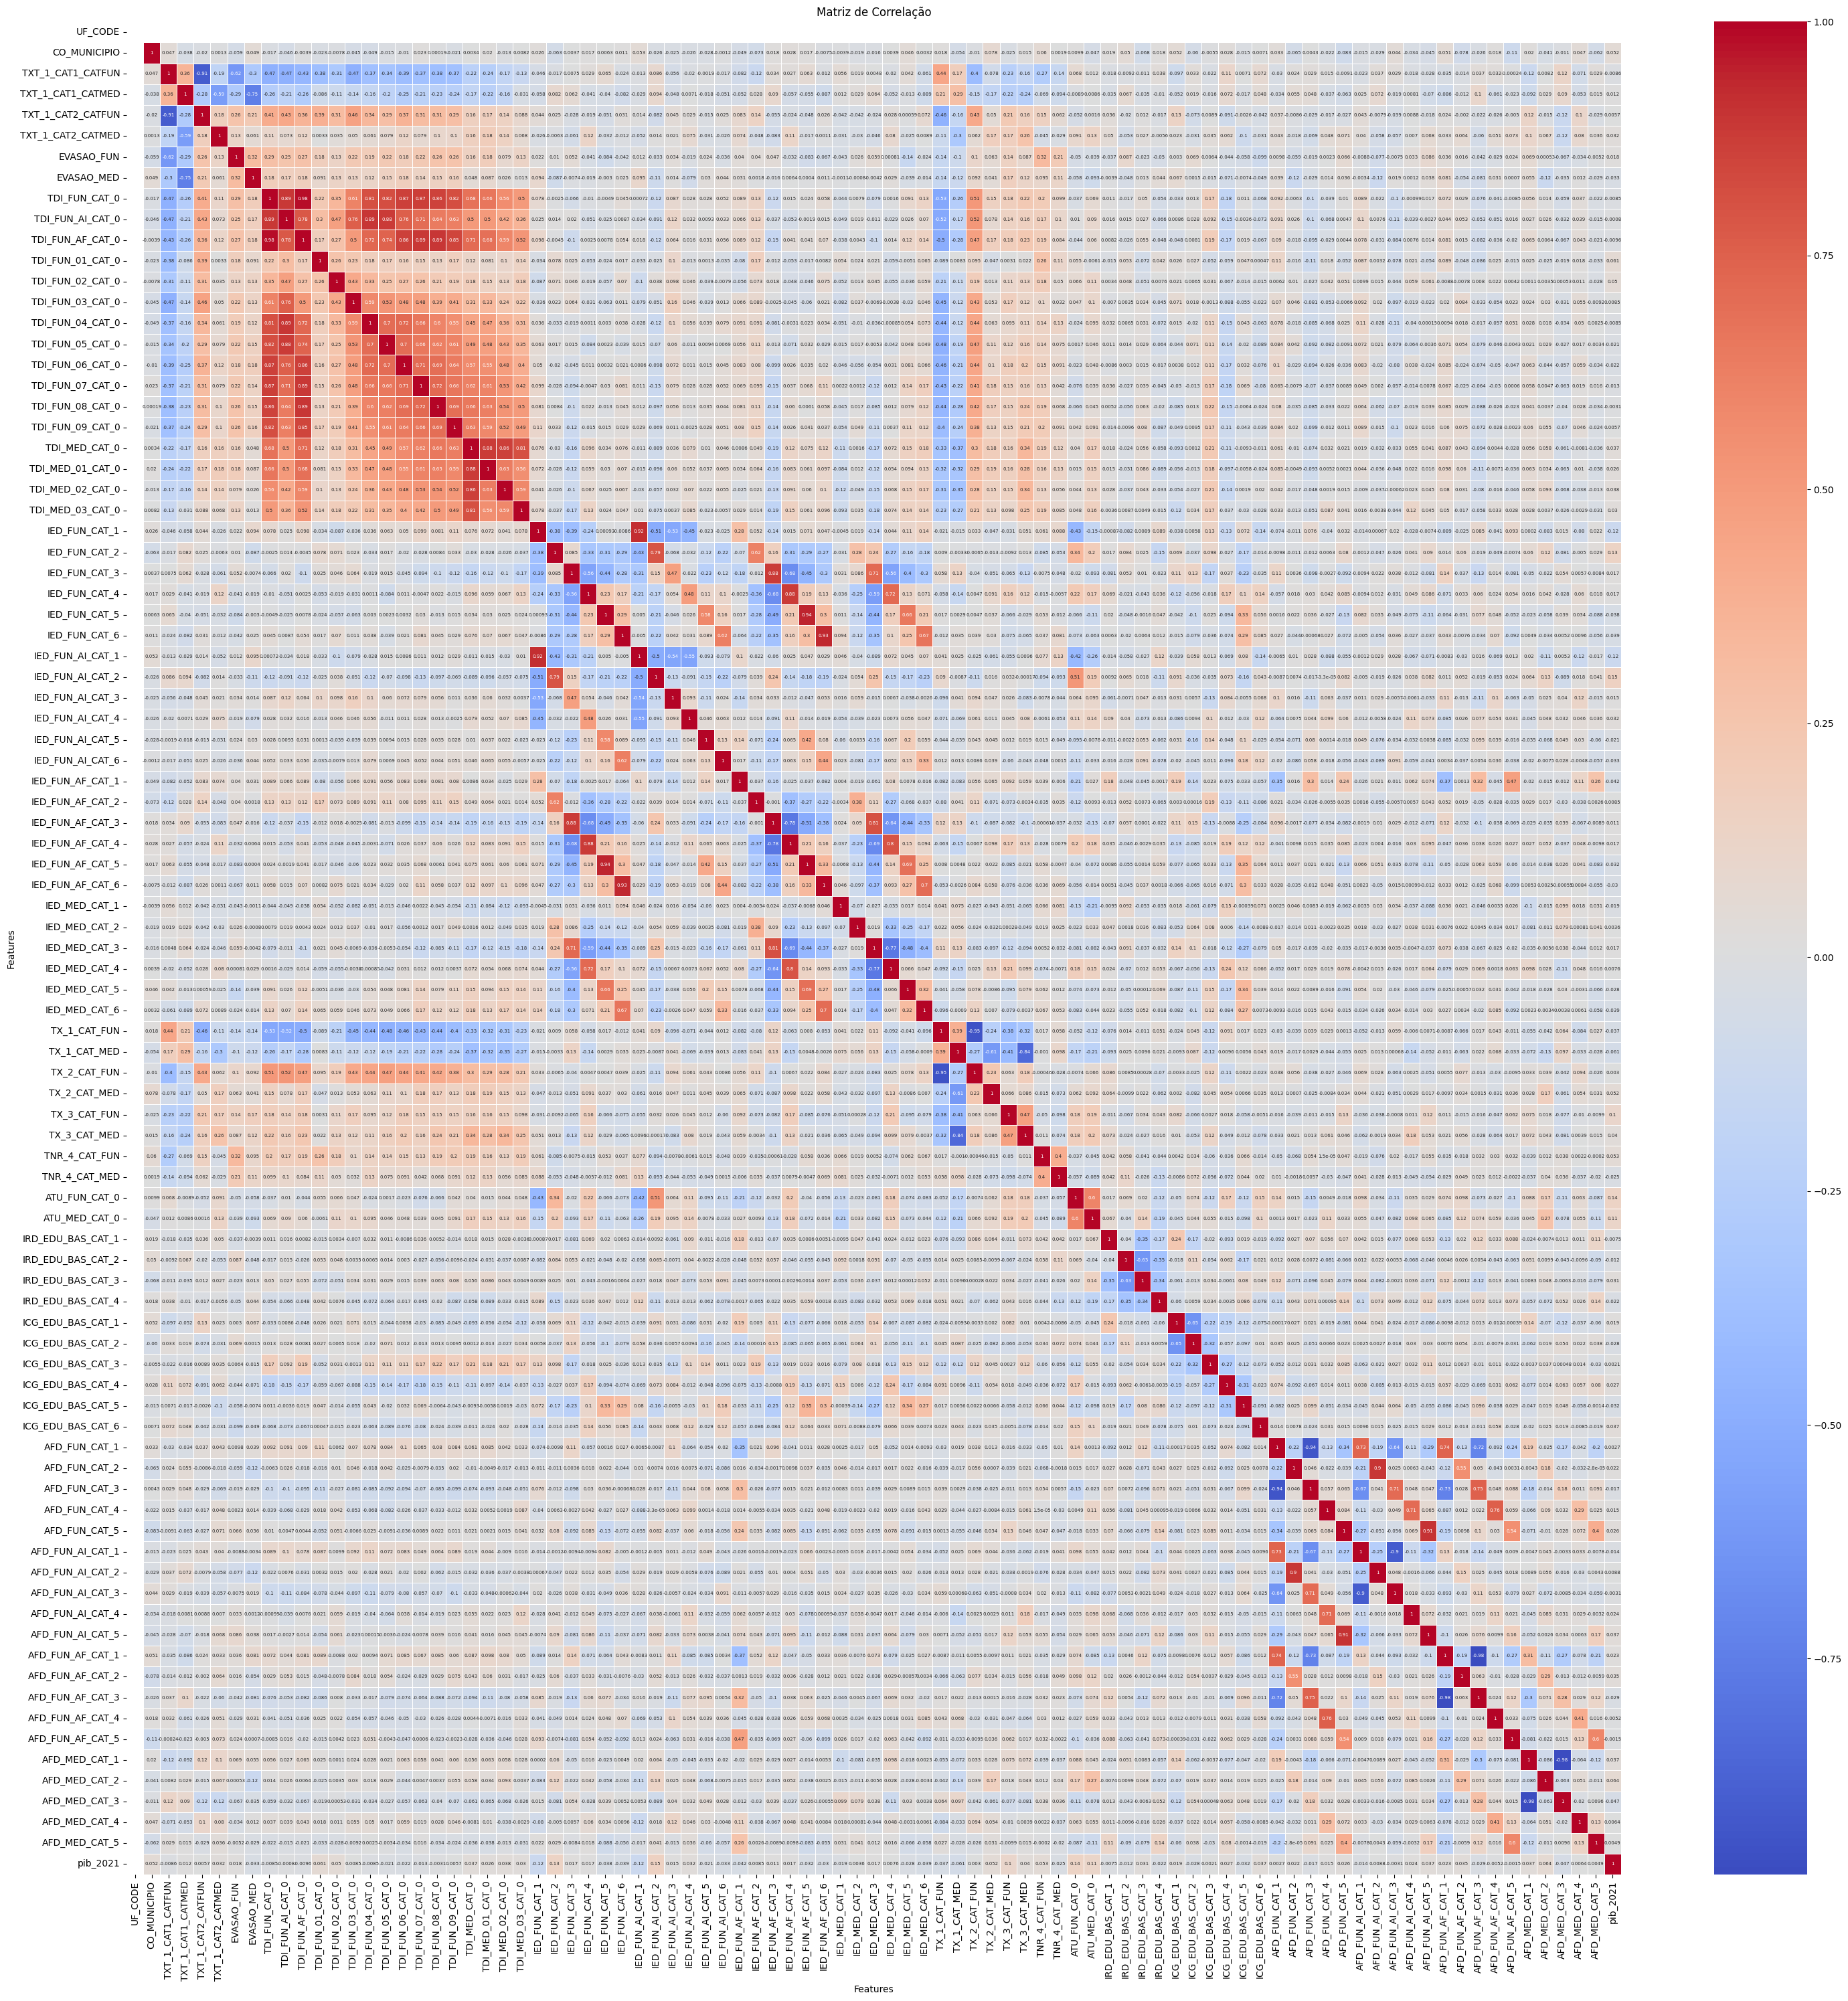

In [117]:
plt.figure(figsize=(30, 30))
# sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 5})
plt.title('Matriz de Correlação')
plt.xlabel('Features')
plt.ylabel('Features')
plt.tight_layout()

plt.show()

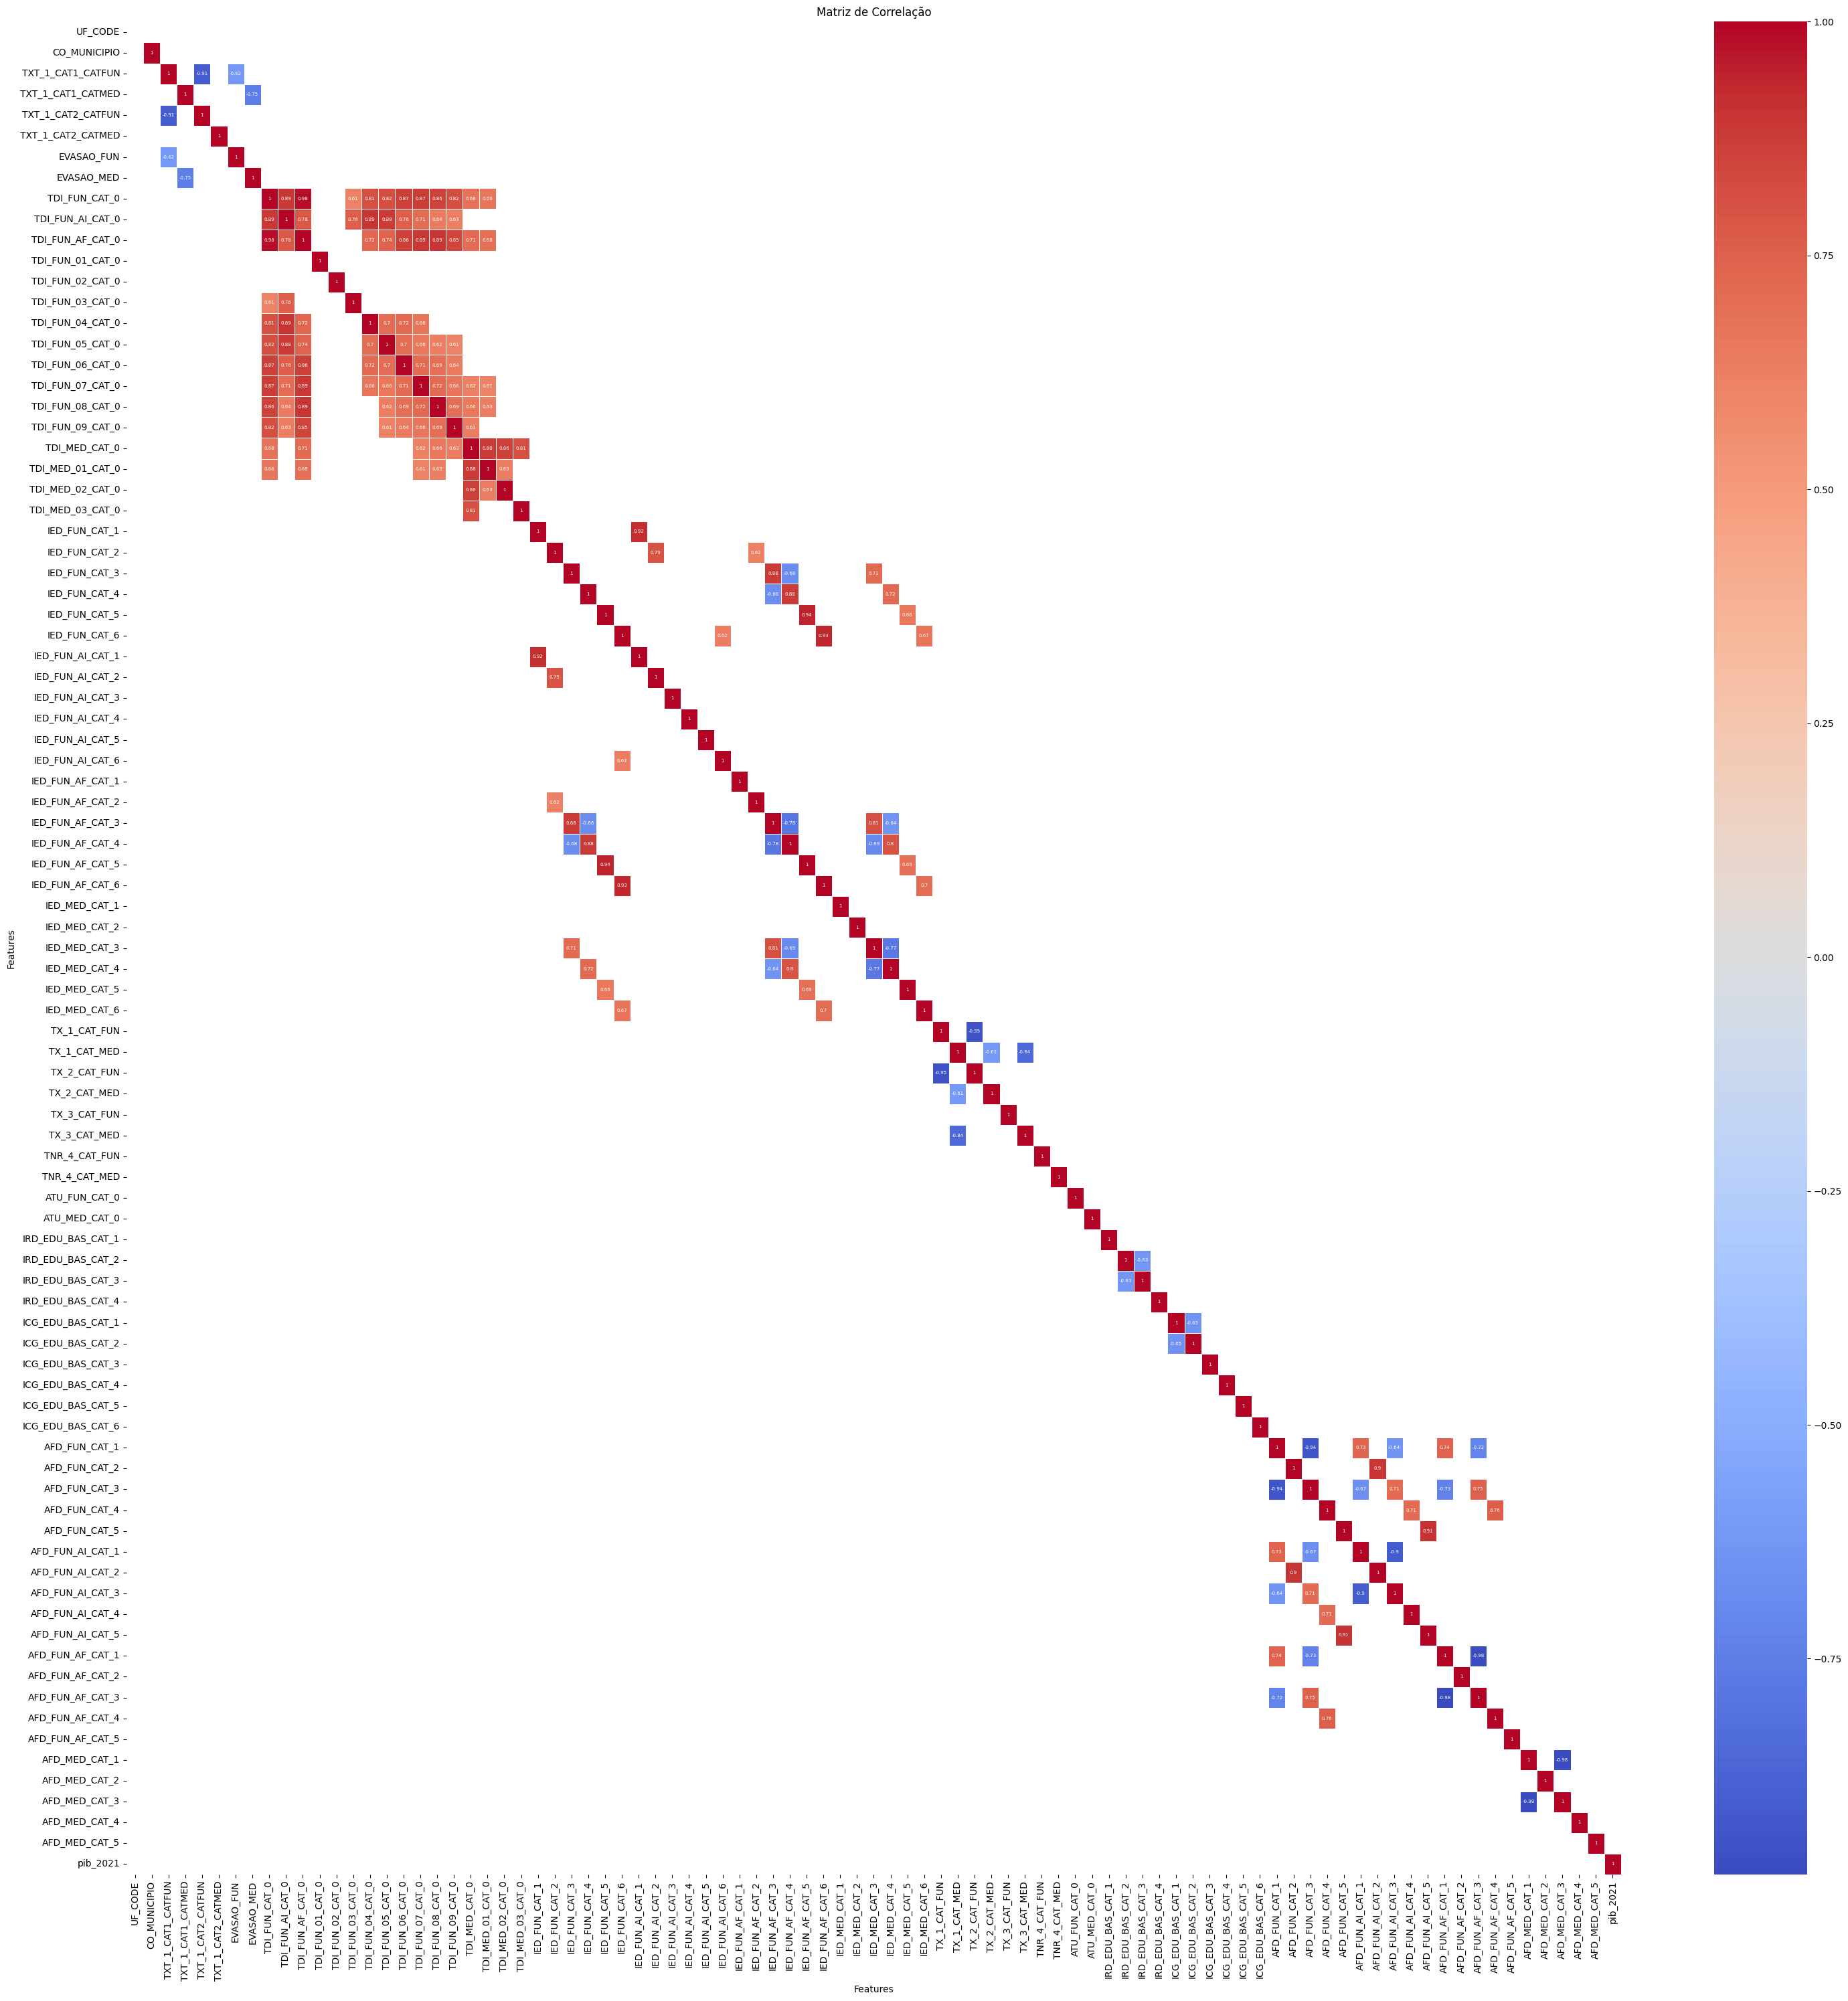

In [118]:
filtered_correlation_matrix = correlation_matrix.mask(correlation_matrix.abs() <= 0.6)

plt.figure(figsize=(30, 30))
# sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 5})
plt.title('Matriz de Correlação')
plt.xlabel('Features')
plt.ylabel('Features')
plt.tight_layout()

plt.show()

Dataset size: 61x61


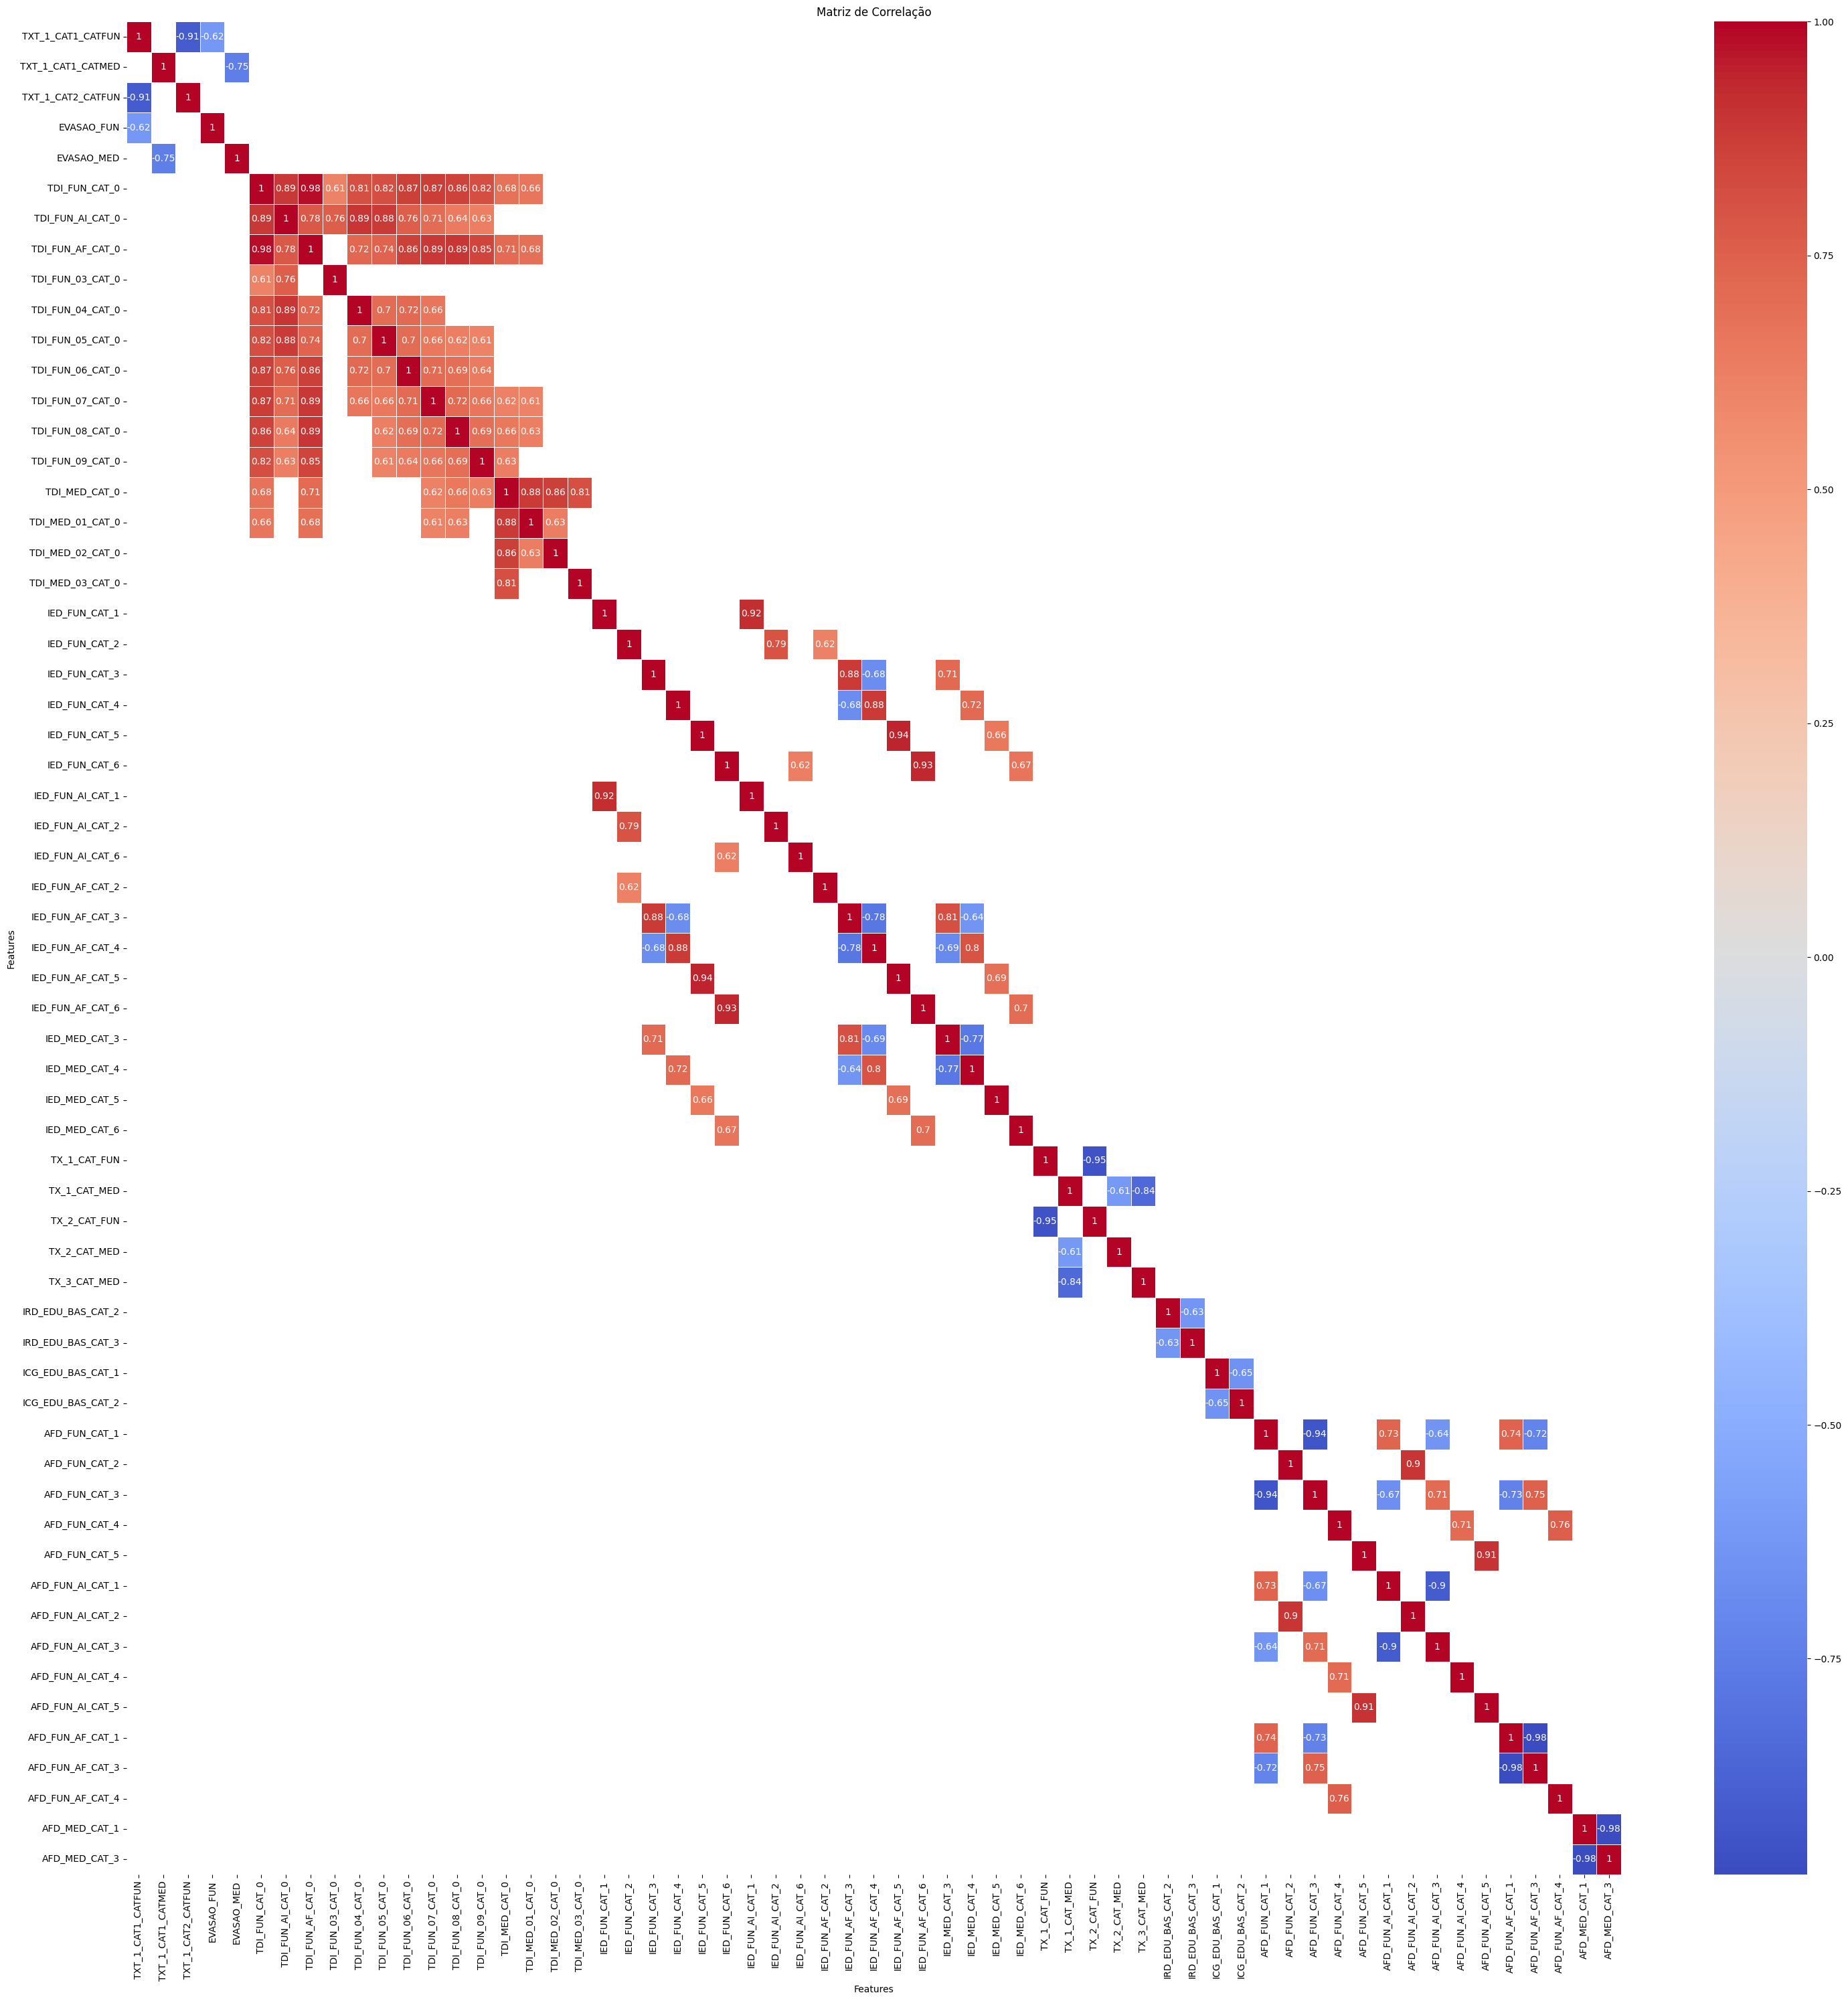

In [119]:
THRESHOLD = 0.6

thresholded_correlation_matrix = correlation_matrix[
    (correlation_matrix > THRESHOLD) | (correlation_matrix < (-THRESHOLD))
]

np.fill_diagonal(thresholded_correlation_matrix.values, np.nan)
thresholded_correlation_matrix.dropna(axis=0, how='all', inplace=True)
thresholded_correlation_matrix.dropna(axis=1, how='all', inplace=True)
np.fill_diagonal(thresholded_correlation_matrix.values, 1)


num_rows, num_columns = thresholded_correlation_matrix.shape
print(f"Dataset size: {num_rows}x{num_columns}")

plt.figure(figsize=(30, 30))
# sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
sns.heatmap(thresholded_correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação')
plt.xlabel('Features')
plt.ylabel('Features')
plt.tight_layout()

plt.show()